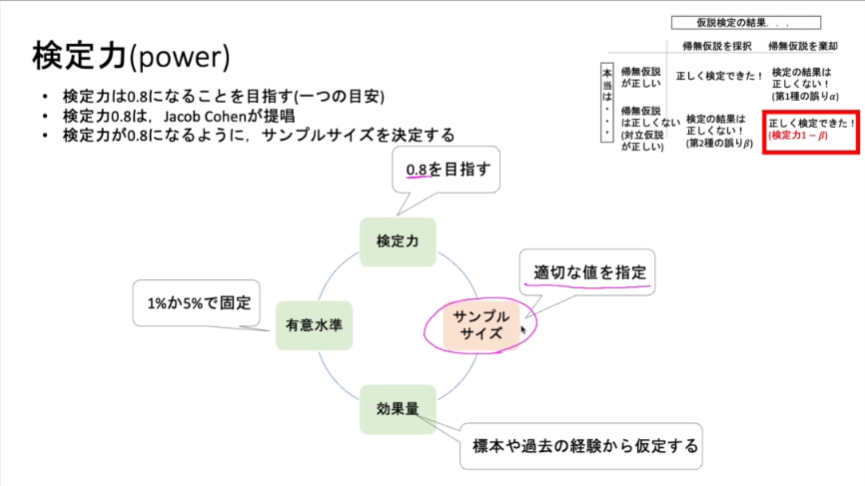

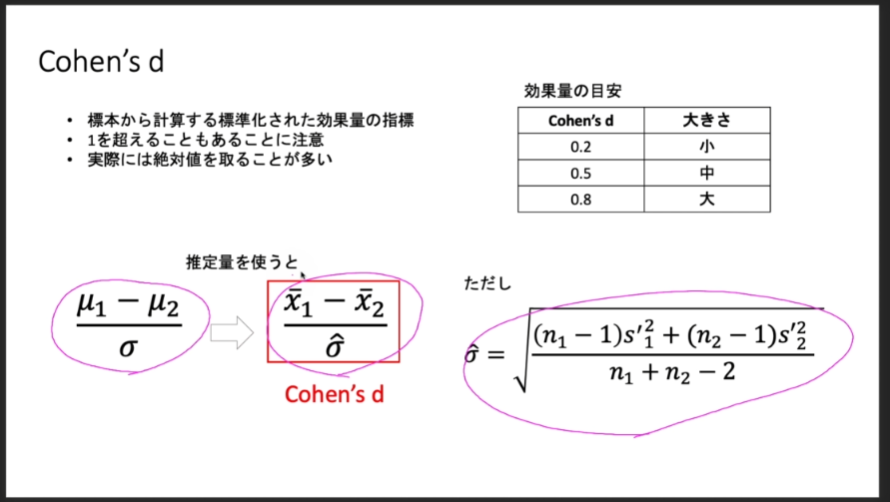

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api

### Cohen’s d

In [2]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [7]:
def cohen_d(x1, x2):
    n1 = len(x1)
    n2 = len(x2)
    dof = n1 + n2 -2
    std = np.sqrt(((n1-1)*stats.tvar(x1)+(n2-1)*stats.tvar(x2))/dof)
    return np.abs(np.mean(x1) - np.mean(x2)) / std

In [8]:
cohen_d(df[df['sex']=='Male']['tip_rate'], df[df['sex']=='Female']['tip_rate'])

0.14480153987269387

### 検定力分析

In [9]:
power = statsmodels.stats.power.TTestIndPower()

In [11]:
male_tipr = df[df['sex'] == 'Male']['tip_rate']
female_tipr = df[df['sex'] == 'Female']['tip_rate']

In [14]:
stats.ttest_ind(male_tipr, female_tipr, equal_var = False) # ウェルチの検定

Ttest_indResult(statistic=-1.1432770167349968, pvalue=0.25424561889275826)

In [18]:
effect_size = cohen_d(male_tipr, female_tipr)
print(effect_size)

0.14480153987269387


In [25]:
n1 = len(male_tipr)
n2 = len(female_tipr)
print(n1, n2)

157 87


In [23]:
stats.power = power.solve_power(effect_size=effect_size, nobs1=n1, alpha=0.05, power=None, ratio=n2/n1)

In [24]:
power.solve_power(effect_size=effect_size, nobs1=None, alpha=0.05, power=0.8, ratio=n2/n1)

1051.0959553846437

In [27]:
power.solve_power(effect_size=effect_size, nobs1=None, alpha=0.05, power=0.8, ratio=1)

749.6312654614079

### 検定力の推移

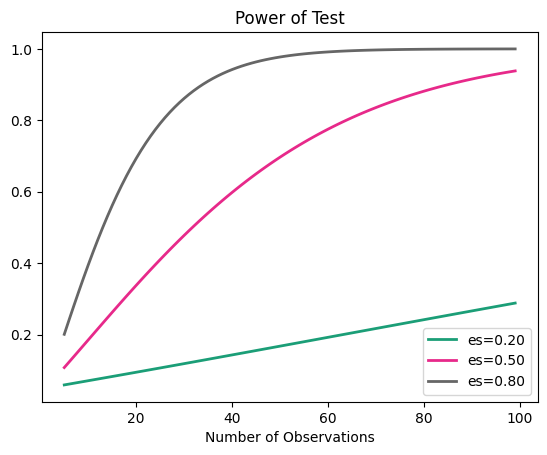

In [30]:
fig = power.plot_power(dep_var='nobs', nobs=np.array(range(5, 100)), effect_size=[0.2, 0.5, 0.8], alpha=0.05)